<a href="https://colab.research.google.com/github/Vishwaschole/Cardiovascular-Risk-Prediction/blob/main/cardiovascular_Almabetter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Cardiovascular Risk prediction**

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 3390 records and 15 attributes.


# **Data Description**
Demographic:


*   Sex: male or female("M" or "F")
*   Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
*   Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
*   BP Meds: whether or not the patient was on blood pressure medication (Nominal)
*   Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
*   Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*   Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
*   Tot Chol: total cholesterol level (Continuous)
*   Sys BP: systolic blood pressure (Continuous)
*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)
*   Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
*   Glucose: glucose level (Continuous)
Predict variable (desired target)
*   **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**





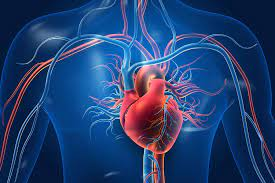

# **Problem Description**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the libraries**

In [2]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv')

In [4]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
#checking null value in data
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
# Before Altering the Data copying orinal data
df_copy=df.copy()

In [9]:
# Missing Value Count Function
def show_missing():
    missing = df_copy.columns[df_copy.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df_copy[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df_copy[show_missing()].isnull().sum().sort_values(ascending = False)/len(df_copy)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [10]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
#size of graph
plt.rcParams["figure.figsize"] = [10,6]

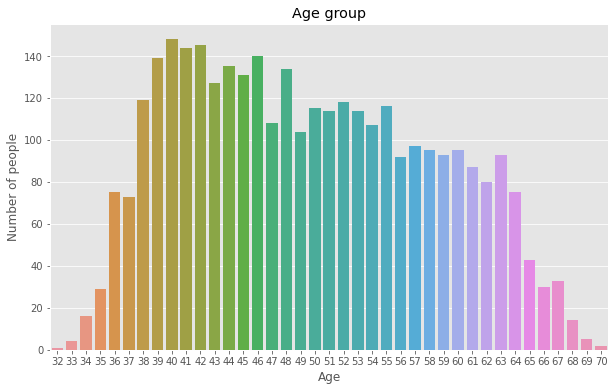

In [12]:
#Plot between Age vs number of people
sns.countplot(df.age)
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Age group")
plt.show()

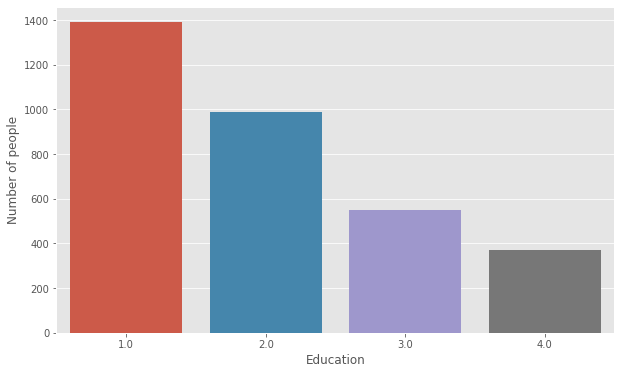

In [13]:
# plot for education and number of people
sns.countplot(df.education)
plt.xlabel("Education")
plt.ylabel("Number of people")
plt.show()

### **smoking vs number of people**

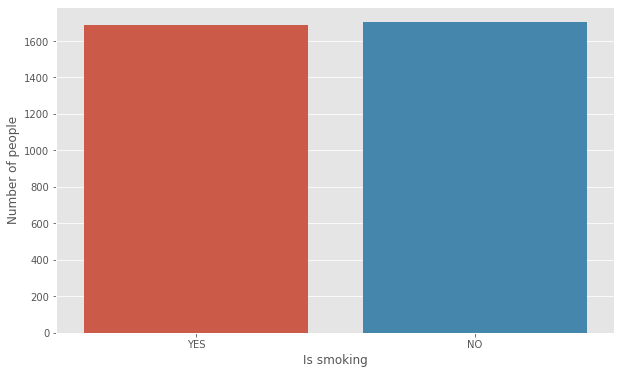

In [14]:
sns.countplot(df.is_smoking)
plt.xlabel("Is smoking")
plt.ylabel("Number of people")
plt.show()

## **Cigarette per day**

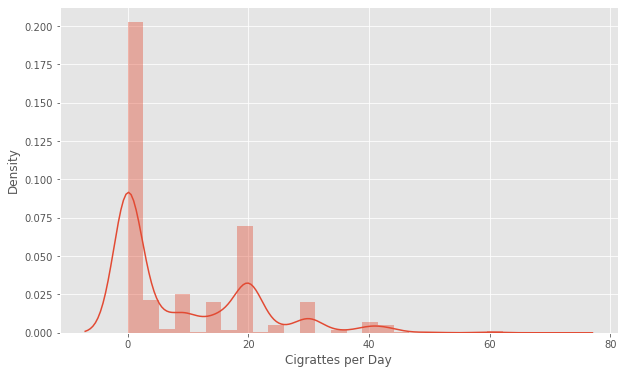

In [15]:
sns.distplot(df.cigsPerDay)
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

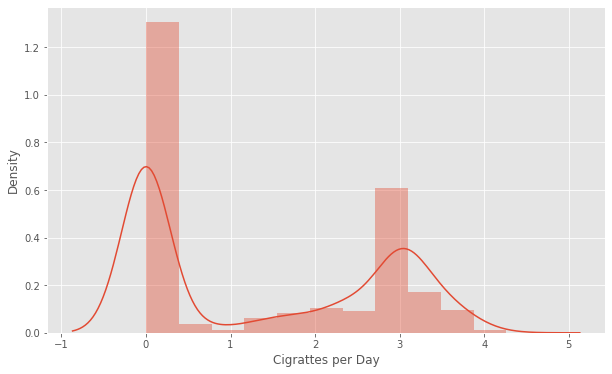

In [16]:
sns.distplot(np.log1p(df.cigsPerDay))
plt.xlabel("Cigrattes per Day")
plt.show()

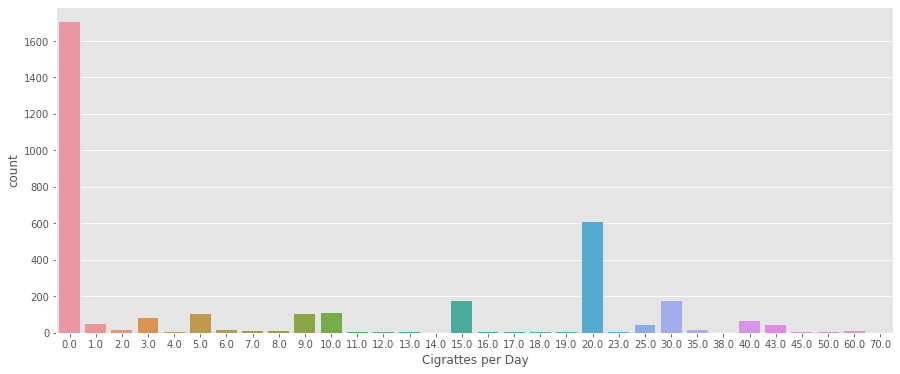

In [17]:
# plot for Number of cigarette vs count
plt.rcParams["figure.figsize"] = [15,6]
sns.countplot(df.cigsPerDay)
plt.xlabel("Cigrattes per Day")
plt.show()

## **BPmeds**

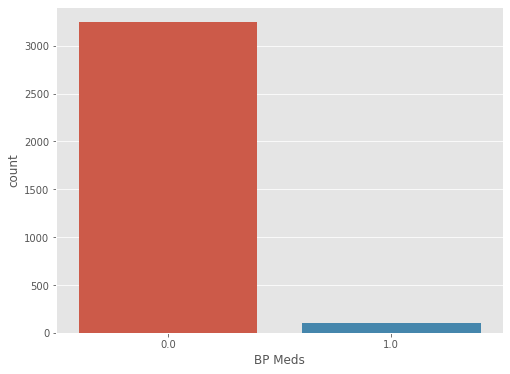

In [18]:
plt.rcParams["figure.figsize"] = [8,6]
sns.countplot(df.BPMeds)
plt.xlabel("BP Meds")
plt.show()

# **Prevalent Strokes**

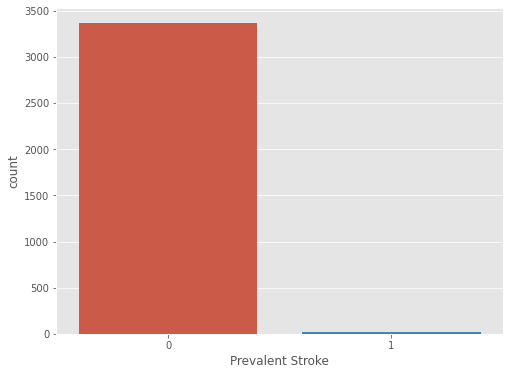

In [19]:
#people count of prevalent strokes
sns.countplot(df.prevalentStroke)
plt.xlabel("Prevalent Stroke")
plt.show()

# **Prevalent hyp**

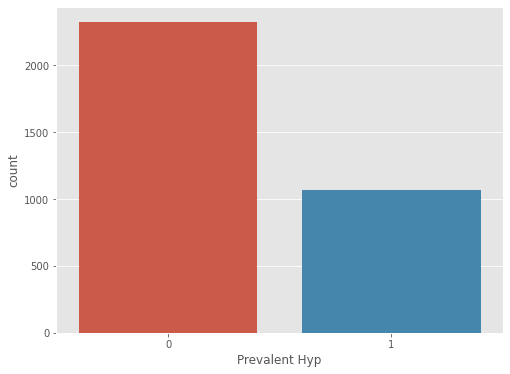

In [20]:
sns.countplot(df_copy.prevalentHyp)
plt.xlabel("Prevalent Hyp")
plt.show()

# **Diabetes**

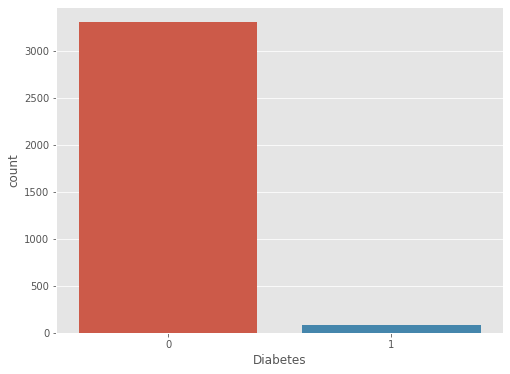

In [21]:
sns.countplot(df_copy.diabetes)
plt.xlabel("Diabetes")
plt.show()

# **totChol**

In [22]:
df_copy.totChol.describe([0.50,0.75,0.90,0.95,0.99])

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
50%       234.000000
75%       264.000000
90%       292.000000
95%       313.450000
99%       355.490000
max       696.000000
Name: totChol, dtype: float64

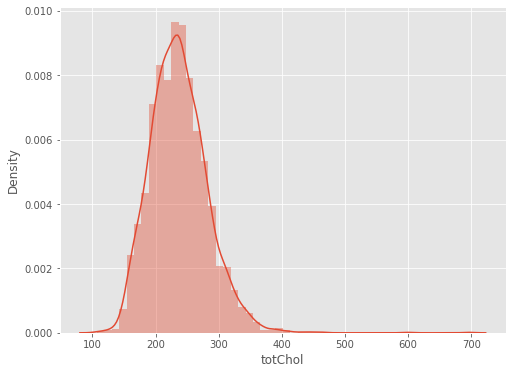

In [23]:
sns.distplot(df_copy.totChol )
plt.xlabel("totChol")
plt.show()

# **sysBP**

In [24]:
df_copy.sysBP.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
50%       128.50000
75%       144.00000
90%       162.50000
95%       175.27500
99%       202.05500
max       295.00000
Name: sysBP, dtype: float64

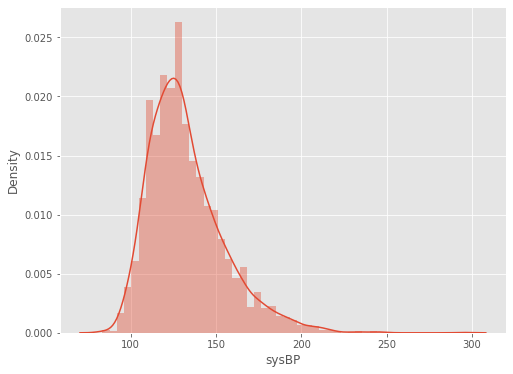

In [25]:
sns.distplot(df_copy.sysBP )
plt.xlabel("sysBP")
plt.show()

# **diaBP**

In [26]:
df_copy.diaBP.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean       82.883038
std        12.023581
min        48.000000
50%        82.000000
75%        90.000000
90%        98.000000
95%       105.000000
99%       119.110000
max       142.500000
Name: diaBP, dtype: float64

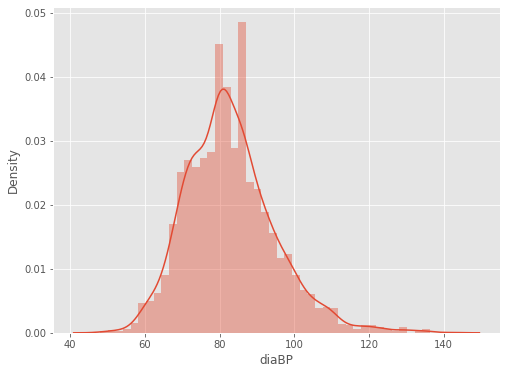

In [27]:
sns.distplot(df_copy.diaBP )
plt.xlabel("diaBP")
plt.show()

# **BMI**

In [28]:
df_copy.BMI.describe([0.50,0.75,0.90,0.95,0.99])

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
50%        25.380000
75%        28.040000
90%        30.875000
95%        32.852500
99%        38.855000
max        56.800000
Name: BMI, dtype: float64

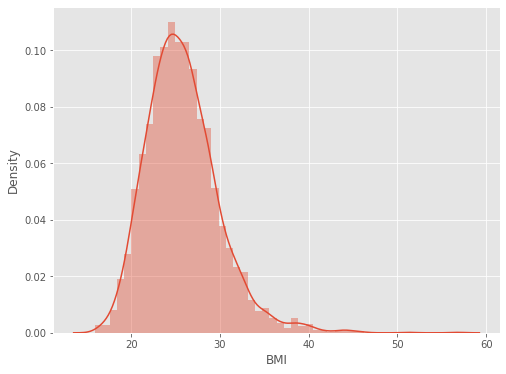

In [29]:
sns.distplot(df_copy.BMI )
plt.xlabel("BMI")
plt.show()

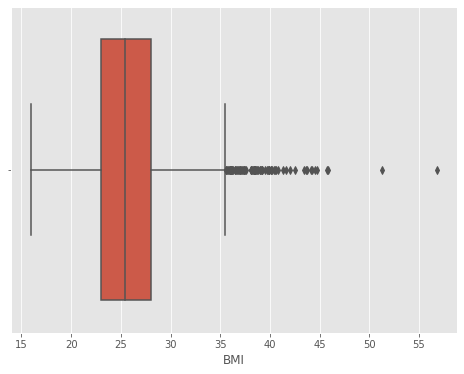

In [30]:
sns.boxplot(df_copy.BMI )
plt.xlabel("BMI")
plt.show()

# **HeartRate**

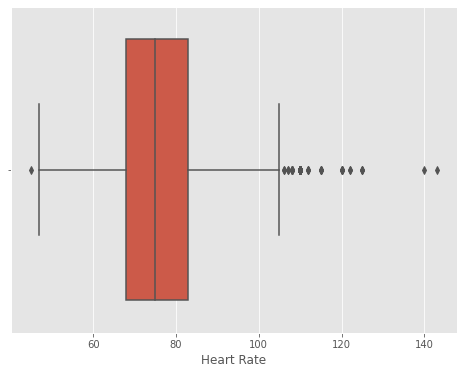

In [31]:
sns.boxplot(df_copy.heartRate )
plt.xlabel("Heart Rate")
plt.show()

In [32]:
df_copy.heartRate.describe([0.50,0.75,0.90,0.95,0.99])

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
50%        75.000000
75%        83.000000
90%        92.000000
95%        98.000000
99%       110.000000
max       143.000000
Name: heartRate, dtype: float64

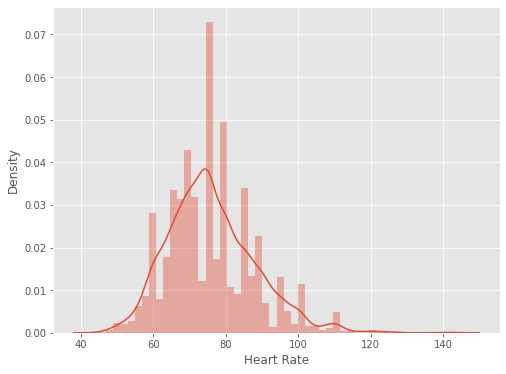

In [33]:
sns.distplot(df_copy.heartRate )
plt.xlabel("Heart Rate")
plt.show()

# **Glucose**

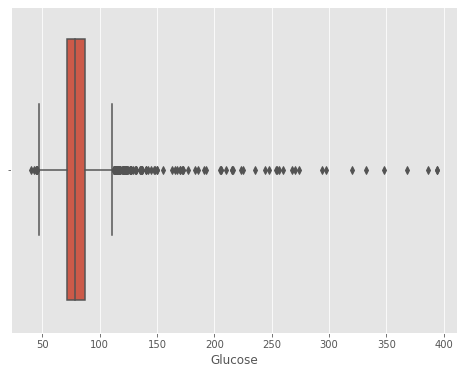

In [34]:
sns.boxplot(df_copy.glucose )
plt.xlabel("Glucose")
plt.show()

In [35]:
df_copy.glucose.describe([0.50,0.75,0.90,0.95,0.99])

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
50%        78.000000
75%        87.000000
90%        98.000000
95%       110.000000
99%       183.450000
max       394.000000
Name: glucose, dtype: float64

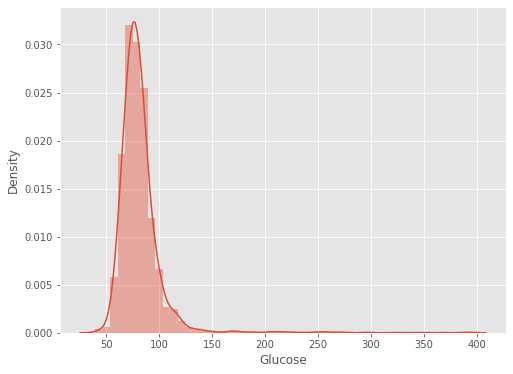

In [36]:
sns.distplot(df_copy.glucose)
plt.xlabel("Glucose")
plt.show()

# **TenyearCHD**

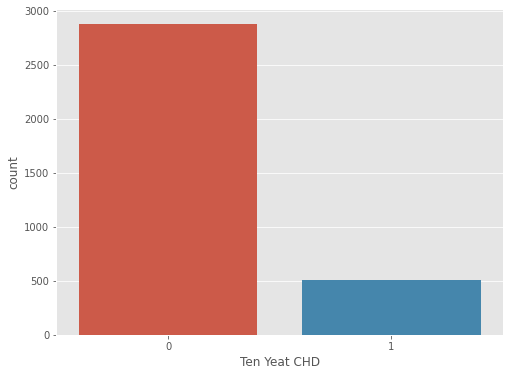

In [37]:
sns.countplot(df_copy.TenYearCHD)
plt.xlabel("Ten Yeat CHD")
plt.show()

### observation;- Slightly more males are suffering from CHD than females.

The percentage of people who have CHD is almost equal between smokers and non smokers.

The percentage of people who have CHD is higher among the diabetic, and those with prevalent hypertension as compared to those who don’t have similar morbidities.

A larger percentage of the people who have CHD are on blood pressure medication.

# **Bivariant analysis**

### **Age Vs TenYearCHD**

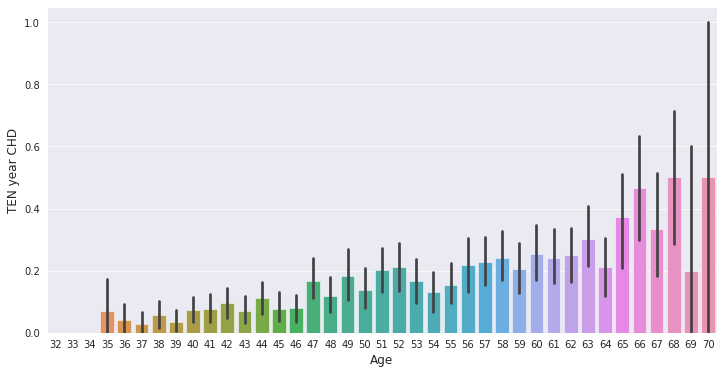

In [38]:
sns.set_style(style='darkgrid')
plt.figure(figsize = (12,6))
sns.barplot(df_copy.age,df_copy.TenYearCHD)
plt.xlabel('Age')
plt.ylabel('TEN year CHD')
plt.show()

### **Education Vs Ten Year CHD**

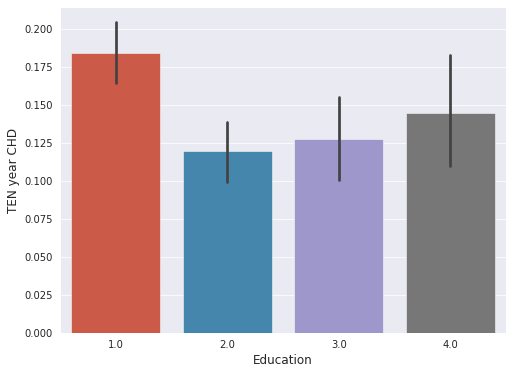

In [39]:
sns.barplot(df_copy.education,df_copy.TenYearCHD)
plt.xlabel('Education')
plt.ylabel('TEN year CHD')
plt.show()

## **Sex Vs Ten Year CHD**

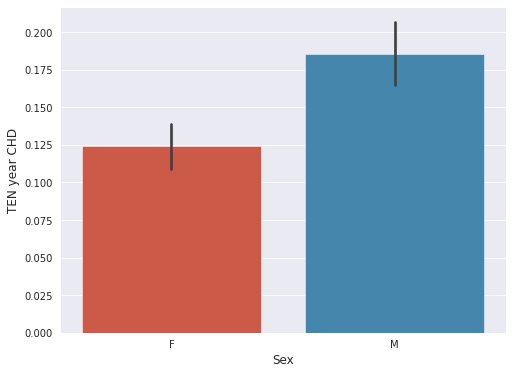

In [40]:
sns.barplot(df_copy.sex,df_copy.TenYearCHD)
plt.xlabel('Sex')
plt.ylabel('TEN year CHD')
plt.show()


## **is_smoking Vs Ten year CHD**

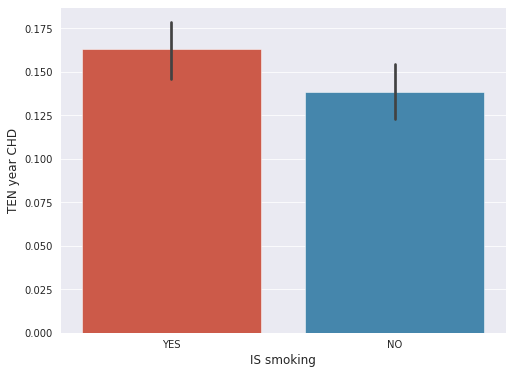

In [41]:
sns.barplot(df_copy.is_smoking,df_copy.TenYearCHD)
plt.xlabel('IS smoking')
plt.ylabel('TEN year CHD')
plt.show()

## **cigratesperday Vs Ten year CHD**

Text(0.5, 1.0, 'Line Plot')

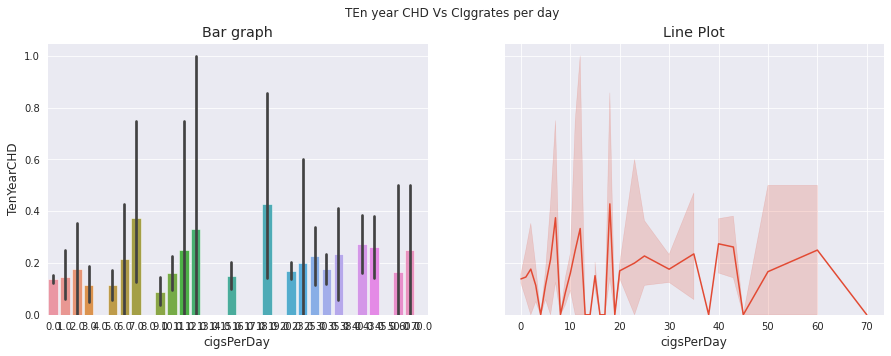

In [42]:
#Bar plot for cigratesperday Vs Ten year CHD and Line plot cigar per day
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('TEn year CHD Vs CIggrates per day')

sns.barplot(ax=axes[0], x='cigsPerDay',y='TenYearCHD',data=df_copy)
axes[0].set_title('Bar graph')

sns.lineplot(ax=axes[1],  x='cigsPerDay',y='TenYearCHD',data=df_copy)
axes[1].set_title('Line Plot')

# **BPMeds Vs TenYearCHD**

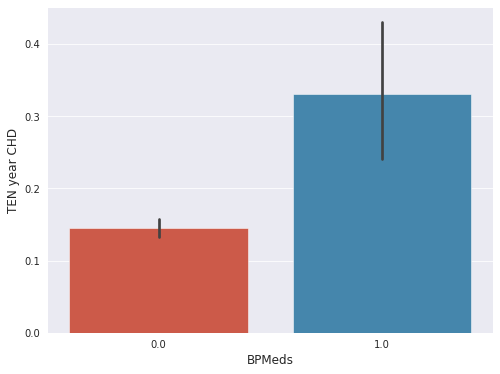

In [43]:
df.columns

sns.barplot(df_copy.BPMeds,df_copy.TenYearCHD)
plt.xlabel('BPMeds')
plt.ylabel('TEN year CHD')
plt.show()

## **PrevalentStrokes Vs TenYearCHD**

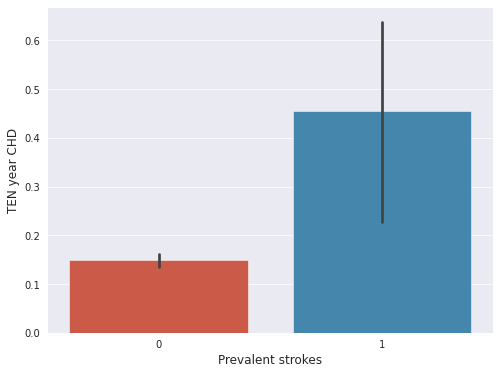

In [44]:
sns.barplot(df_copy.prevalentStroke,df_copy.TenYearCHD)
plt.xlabel('Prevalent strokes')
plt.ylabel('TEN year CHD')
plt.show()

## **Prevalent Hyp Vs Ten YearCHD**

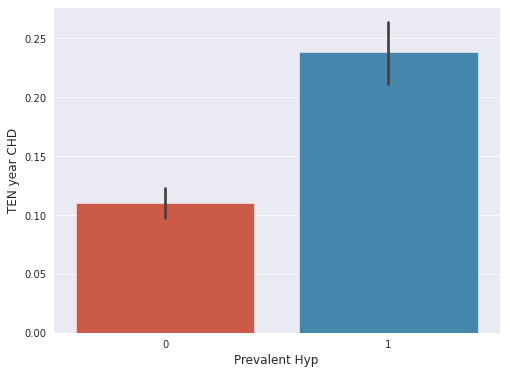

In [45]:
sns.barplot(df_copy.prevalentHyp,df_copy.TenYearCHD)
plt.xlabel('Prevalent Hyp')
plt.ylabel('TEN year CHD')
plt.show()

## **Diabetes Vs Ten Year CHD**

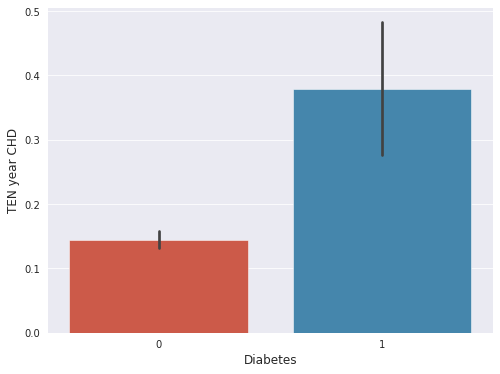

In [46]:
sns.barplot(df_copy.diabetes,df_copy.TenYearCHD)
plt.xlabel('Diabetes')
plt.ylabel('TEN year CHD')
plt.show()

## **TOT Chol Vs Ten Year CHD**

Text(0.5, 1.0, 'Line Plot')

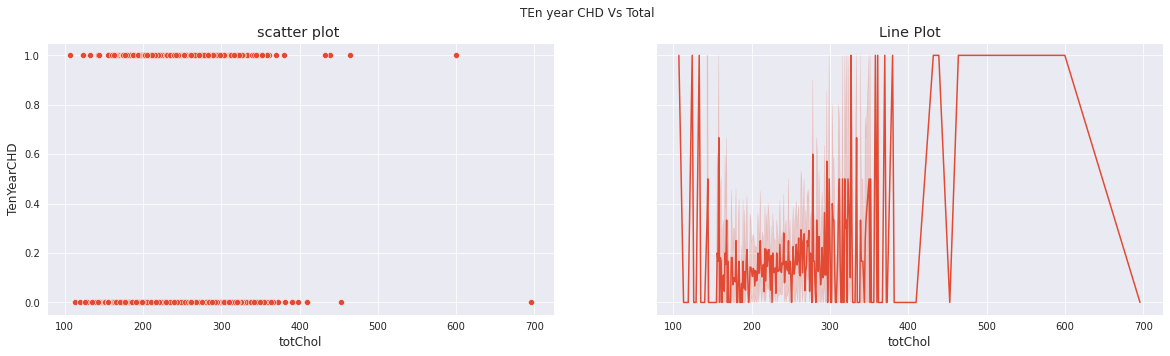

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs Total')

sns.scatterplot(ax=axes[0], x='totChol',y='TenYearCHD',data=df_copy)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='totChol',y='TenYearCHD',data=df_copy)
axes[1].set_title('Line Plot')

## **SYS BP Vs Ten Year CHD**

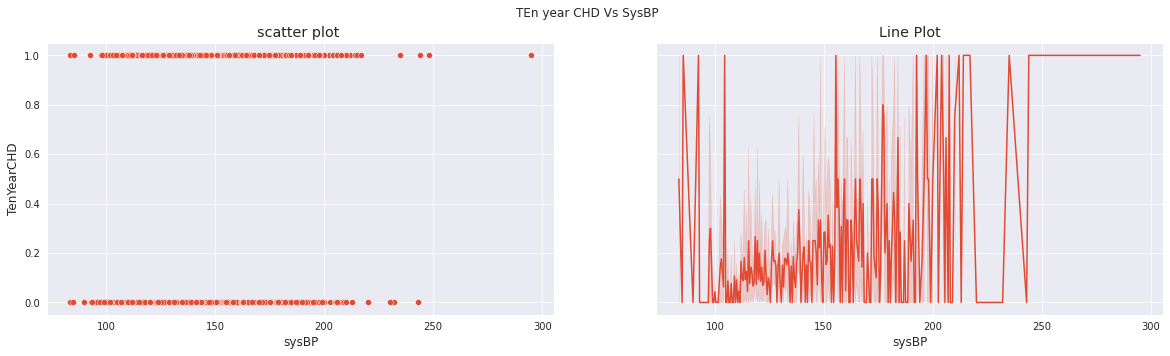

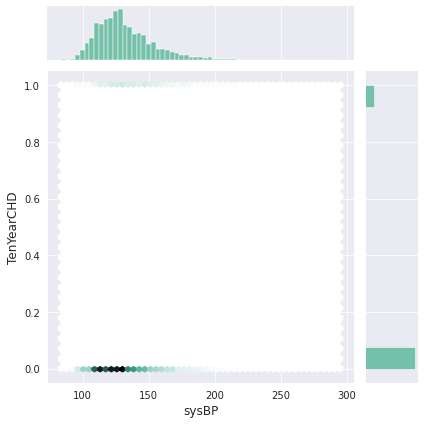

In [48]:
df.sysBP.describe()

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs SysBP')

sns.scatterplot(ax=axes[0], x='sysBP',y='TenYearCHD',data=df_copy)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='sysBP',y='TenYearCHD',data=df_copy)
axes[1].set_title('Line Plot')

sns.jointplot(x=df.sysBP, y=df.TenYearCHD, kind="hex", color="#4CB391")
